# Binary Classification Model for Edible Mushrooms Using Python
### David Lowe
### June 19, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery (http://machinelearningmastery.com/)

Dataset Used: Mushroom Data Set

Dataset ML Model: Binary classification with categorical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Mushroom

One potential source of performance benchmarks: https://www.kaggle.com/uciml/mushroom-classification

INTRODUCTION: This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible or poisonous. The Guide, The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf, clearly states that there is no simple rule for determining the edibility of a mushroom.

CONCLUSION: It was interesting to observe that just about all algorithms (except Naive Bayes and Support Vector Machine) scored an accuracy of 100% on the training data using a training/validation split of 70%/30%. Furthermore, all eight algorithms also scored a 100% accuracy rate using the validation dataset.

I reduced the training and validation to only a 50%-50% split, so the algorithms had less training data to work with. The same eight algorithms tunred in a 100% accuracy on the larger validation dataset. After reducing the training and validation to a 30%-70% split, the Stochastic Gradient Boosting model dropped out of the race for predictive perfection. After a 20%-80% of training and validation split, Random Forest was the only model that was able to maintain a perfect prediction score for both the training and validation datasets.

For future studies, we can examine and see whether the machine learning algorithms can be trained with less features but still maintain the high prediction accuracy. For now, the Random Forest algorithm appeared to be the best-performing model for determining whether mushroom species are edible.

The purpose of this project is to analyze predictions using various machine learning algorithms and to document the steps using a template. Working through machine learning problems from end-to-end requires a structured modeling approach. Working problems through a project template can also encourage us to think about the problem more critically, to challenge our assumptions, and to get proficient at all parts of a modeling project.

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem
### 1.a) Load ibraries

In [1]:
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas import get_dummies
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'mushrooms.csv'
entireDataset = read_csv(inputFile)
entireDataset = entireDataset.rename(columns={'class': 'targetVar'})

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [3]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [4]:
set_option('display.width', 100)
print(entireDataset.head(20))

   targetVar cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size  \
0          p         x           s         n       t    p               f            c         n   
1          e         x           s         y       t    a               f            c         b   
2          e         b           s         w       t    l               f            c         b   
3          p         x           y         w       t    p               f            c         n   
4          e         x           s         g       f    n               f            w         b   
5          e         x           y         y       t    a               f            c         b   
6          e         b           s         w       t    a               f            c         b   
7          e         b           y         w       t    l               f            c         b   
8          p         x           y         w       t    p               f            c         n   


#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(8124, 23)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

targetVar                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

       targetVar cap-shape cap-surface cap-color bruises  odor gill-attachment gill-spacing  \
count       8124      8124        8124      8124    8124  8124            8124         8124   
unique         2         6           4        10       2     9               2            2   
top            e         x           y         n       f     n               f            c   
freq        4208      3656        3244      2284    4748  3528            7914         6812   

       gill-size gill-color   ...   stalk-surface-below-ring stalk-color-above-ring  \
count       8124       8124   ...                       8124                   8124   
unique         2         12   ...                          4                      9   
top            b          b   ...                          s                      w   
freq        5612       1728   ...                       4936                   4464   

       stalk-color-below-ring veil-type veil-color ring-number ring-type spore-print-col

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.groupby('targetVar').size())

targetVar
e    4208
p    3916
dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

targetVar                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

In [11]:
# Histograms for each attribute
#entireDataset.hist()
#pyplot.show()

In [12]:
# Density plot for each attribute
#entireDataset.plot(kind='density', subplots=True, layout=(dispRow,dispCol), sharex=False)
#pyplot.show()

In [13]:
# Box and Whisker plot for each attribute
#entireDataset.plot(kind='box', subplots=True, layout=(dispRow,dispCol), sharex=False, sharey=False)
#pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

In [14]:
# Correlation matrix
#fig = pyplot.figure()
#ax = fig.add_subplot(111)
#cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
#fig.colorbar(cax)
#pyplot.show()

In [15]:
# Scatterplot matrix
#scatter_matrix(entireDataset)
#pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [16]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [17]:
# Eliminate additional co-related columns
# Eliminate the column "season" since it is highly co-related with "mnth"
# Eliminate the column "atemp" since it is highly co-related with "temp"
entireDataset.drop('veil-type', axis=1, inplace=True)
totCol = len(entireDataset.columns)
totAttr = totCol-1

### 3.c) Data Transforms

In [18]:
# Conver the string variables to categorical variables as appropriate
# get column names of data frame in a list
col_names = list(entireDataset)
# loop to change each column to category type
for col in col_names:
    entireDataset[col] = entireDataset[col].astype('category')
print(entireDataset.dtypes)

targetVar                   category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object


In [19]:
# Apply the One-Hot-Encoding (Dummy Variables) technique
entireDataset_dummies = get_dummies(entireDataset)
print(entireDataset_dummies.dtypes)

targetVar_e            uint8
targetVar_p            uint8
cap-shape_b            uint8
cap-shape_c            uint8
cap-shape_f            uint8
cap-shape_k            uint8
cap-shape_s            uint8
cap-shape_x            uint8
cap-surface_f          uint8
cap-surface_g          uint8
cap-surface_s          uint8
cap-surface_y          uint8
cap-color_b            uint8
cap-color_c            uint8
cap-color_e            uint8
cap-color_g            uint8
cap-color_n            uint8
cap-color_p            uint8
cap-color_r            uint8
cap-color_u            uint8
cap-color_w            uint8
cap-color_y            uint8
bruises_f              uint8
bruises_t              uint8
odor_a                 uint8
odor_c                 uint8
odor_f                 uint8
odor_l                 uint8
odor_m                 uint8
odor_n                 uint8
                       ...  
ring-number_n          uint8
ring-number_o          uint8
ring-number_t          uint8
ring-type_e   

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [20]:
seedNum = 888
featuresOnly = entireDataset_dummies.loc[:, 'cap-shape_b':'habitat_w']
X_entire = featuresOnly.values
Y_entire = entireDataset_dummies['targetVar_e'].values
validation_size = 0.80
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (8124, 116) Y_entire.shape: (8124,)
X_train.shape: (1624, 116) Y_train.shape: (1624,)
X_validation.shape: (6500, 116) Y_validation.shape: (6500,)
Total time for data handling and visualization: 0:00:00.493202


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Logistic Regression

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [21]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [22]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('BT', BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
results = []
names = []

In [23]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))

LR: 0.998148 (0.002829)
Model training time: 0:00:00.097936
CART: 0.998765 (0.002469)
Model training time: 0:00:00.079954
NB: 0.966148 (0.016527)
Model training time: 0:00:00.051971
KNN: 0.996917 (0.003083)
Model training time: 0:00:00.460939
SVM: 0.982754 (0.010603)
Model training time: 0:00:00.713703
BT: 0.998765 (0.002469)
Model training time: 0:00:00.380996
RF: 0.999387 (0.001840)
Model training time: 0:00:00.171835
ET: 0.999387 (0.001840)
Model training time: 0:00:00.185418
AB: 0.998765 (0.002469)
Model training time: 0:00:01.347387
GBM: 0.998765 (0.002469)
Model training time: 0:00:04.699591


### 4.b) Spot-checking baseline algorithms

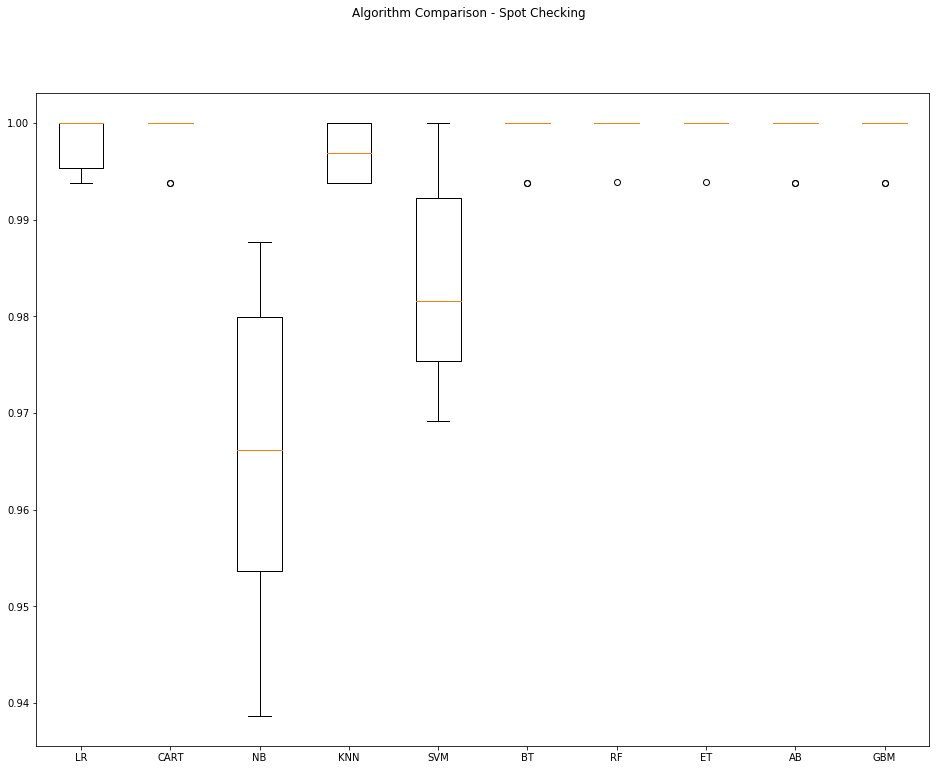

In [24]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.1) Predictions on validation dataset using Logistic Regression model

In [25]:
model1 = LogisticRegression(random_state=seedNum)
model1.fit(X_train, Y_train)
predictions = model1.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[3151    0]
 [   0 3349]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3151
          1       1.00      1.00      1.00      3349

avg / total       1.00      1.00      1.00      6500



### 6.2) Predictions on validation dataset using Decision Trees model

In [26]:
model2 = DecisionTreeClassifier(random_state=seedNum)
model2.fit(X_train, Y_train)
predictions = model2.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[3151    0]
 [   0 3349]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3151
          1       1.00      1.00      1.00      3349

avg / total       1.00      1.00      1.00      6500



### 6.3) Predictions on validation dataset using k-Nearest Neighbors model

In [27]:
model3 = KNeighborsClassifier()
model3.fit(X_train, Y_train)
predictions = model3.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9973846153846154
[[3150    1]
 [  16 3333]]
             precision    recall  f1-score   support

          0       0.99      1.00      1.00      3151
          1       1.00      1.00      1.00      3349

avg / total       1.00      1.00      1.00      6500



### 6.4) Predictions on validation dataset using Bagged Decision Trees model

In [28]:
model4 = BaggingClassifier(random_state=seedNum)
model4.fit(X_train, Y_train)
predictions = model4.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9995384615384615
[[3148    3]
 [   0 3349]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3151
          1       1.00      1.00      1.00      3349

avg / total       1.00      1.00      1.00      6500



### 6.5) Predictions on validation dataset using Random Forest model

In [29]:
model5 = RandomForestClassifier(random_state=seedNum)
model5.fit(X_train, Y_train)
predictions = model5.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[3151    0]
 [   0 3349]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3151
          1       1.00      1.00      1.00      3349

avg / total       1.00      1.00      1.00      6500



### 6.6) Predictions on validation dataset using Extra Trees model

In [30]:
model6 = ExtraTreesClassifier(random_state=seedNum)
model6.fit(X_train, Y_train)
predictions = model6.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9996923076923077
[[3151    0]
 [   2 3347]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3151
          1       1.00      1.00      1.00      3349

avg / total       1.00      1.00      1.00      6500



### 6.7) Predictions on validation dataset using AdaBoost model

In [31]:
model7 = AdaBoostClassifier(random_state=seedNum)
model7.fit(X_train, Y_train)
predictions = model7.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[3151    0]
 [   0 3349]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3151
          1       1.00      1.00      1.00      3349

avg / total       1.00      1.00      1.00      6500



### 6.8) Predictions on validation dataset using Stochastic Gradient Boosting model

In [32]:
model8 = GradientBoostingClassifier(random_state=seedNum)
model8.fit(X_train, Y_train)
predictions = model8.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[3151    0]
 [   0 3349]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      3151
          1       1.00      1.00      1.00      3349

avg / total       1.00      1.00      1.00      6500



In [33]:
print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:00:11.909059
